In [1]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.toy_data import *

import sklearn
import pandas as pd

# Vanilla Case

In [10]:
# Define the deterministic labels for each (x1, x2) pair
true_labels = {
    (0, 0): 0,
    (0, 1): 0,
    (1, 0): 1,
    (1, 1): 1
}

# Define the number of instances for each (x1, x2) pair
instances_counts = {
    (0, 0): 25,
    (0, 1): 25,
    (1, 0): 25,
    (1, 1): 25
}

# Test instances
X_test = np.array(list(true_labels.keys()))

# Define the noise model parameters (probabilities of flipping the label)
flip_p = 0.2
noise_transition_matrix = np.array([[1-flip_p, flip_p], [flip_p, 1-flip_p]])

random_seeds = [42, 23]

X, y = generate_dataset(true_labels, instances_counts)

noisy_ys = generate_noisy_labels(y, random_seeds, noise_transition_matrix=noise_transition_matrix)


In [11]:
compile_bayes_predictions(2, X, y, noisy_ys, random_seeds, instances_counts, true_labels, noise_transition_matrix)

,n,x1,x2,y,clean_0-1,noisy_0-1_seed=42,noisy_0-1_seed=23,noisy_corrected_0-1_seed=42,noisy_corrected_0-1_seed=23
0,25,0,0,0,0,0,0,0,0
1,25,0,1,0,0,0,0,0,0
2,25,1,0,1,1,1,1,1,1
3,25,1,1,1,1,1,1,1,1


In [12]:
model1, loss = bayes_model(2, X, noisy_ys[0], loss_type = "corrected0-1", noise_transition_matrix = noise_transition_matrix)
model2, loss = bayes_model(2, X, noisy_ys[1], loss_type = "corrected0-1", noise_transition_matrix = noise_transition_matrix)

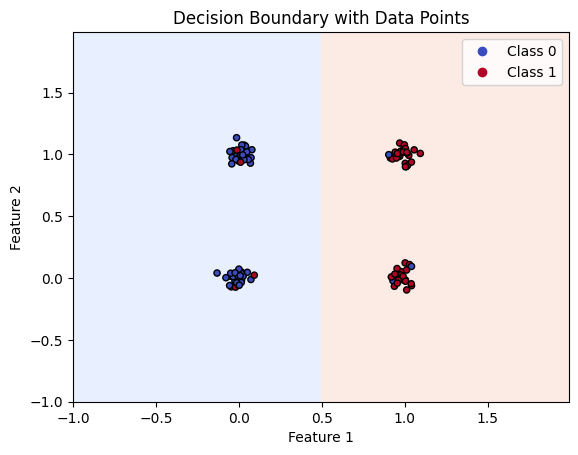

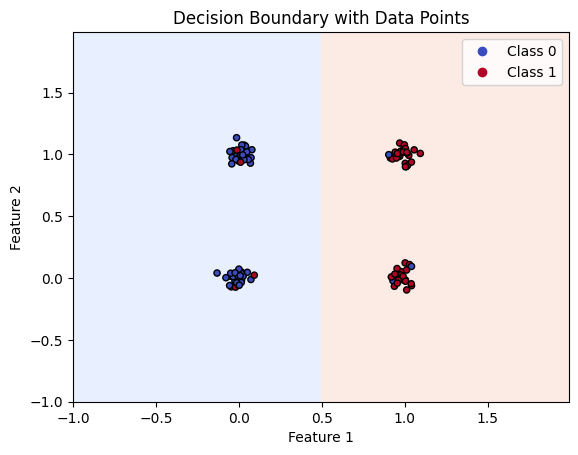

In [13]:
# Example file path, replace with actual path pattern
file_path = "linear_classifier_coefficients/coefs_complete_sym_d_0"+str(2)+".csv"

# Load the coefficients from the CSV file
# The file path will need to be adjusted to the actual path where your file is stored
models = (load_coefficients(file_path))

# Plot the decision boundary
plot_decision_boundary(model1, X, noisy_ys[0])
plt.show()

# Plot the decision boundary
plot_decision_boundary(model2, X, noisy_ys[1])
plt.show()